In [2]:
from qiskit import *


In [25]:
from qiskit.tools.visualization import circuit_drawer

In [16]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [17]:
circuit = QuantumCircuit(qr,cr) 

In [30]:
%matplotlib inline

In [18]:
circuit.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

In [19]:
circuit.h(qr[0])

In [20]:
circuit.draw(initial_state=True)

┌───┐
q1_0: |0>┤ H ├
         └───┘
q1_1: |0>─────
              
 c1: 0 2/═════

In [21]:
circuit.cx(qr[0],qr[1])

In [24]:
circuit.draw(initial_state=True)

┌───┐     
q1_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q1_1: |0>─────┤ X ├
              └───┘
 c1: 0 2/══════════

In [25]:
circuit.measure(qr,cr)

In [26]:
circuit.draw(initial_state=True)

┌───┐     ┌─┐   
q1_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q1_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c1: 0 2/═══════════╩══╩═
                    0  1

In [27]:
simul=Aer.get_backend('qasm_simulator')

In [28]:
res=execute(circuit,backend= simul ).result()

In [4]:
from qiskit.tools.visualization import plot_histogram

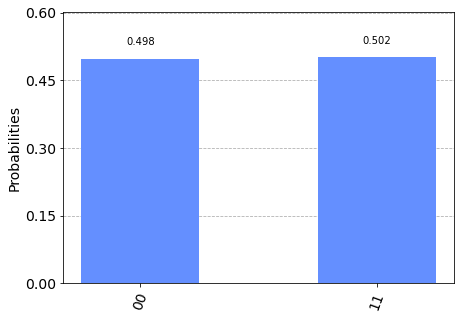

In [30]:
plot_histogram(res.get_counts(circuit))

In [5]:
from qiskit.tools.visualization import plot_bloch_multivector

In [6]:
Cir=QuantumCircuit(1,1)
Cir.x(0)
Sim= Aer.get_backend('statevector_simulator')

In [10]:
Res2= execute(Cir,backend= Sim ).result()
Stv=Res2.get_statevector()
print(Stv)
Cir.draw(initial_state=True)

[0.+0.j 1.+0.j]


┌───┐
q_0: |0>┤ X ├
        └───┘
 c: 0 1/═════

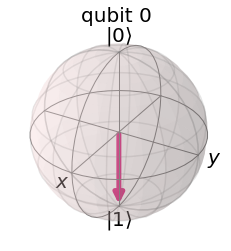

In [11]:
plot_bloch_multivector(Stv)

In [12]:
Sim= Aer.get_backend('unitary_simulator')
Res2= execute(Cir,backend= Sim ).result()
Stv=Res2.get_unitary()
print(Stv)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


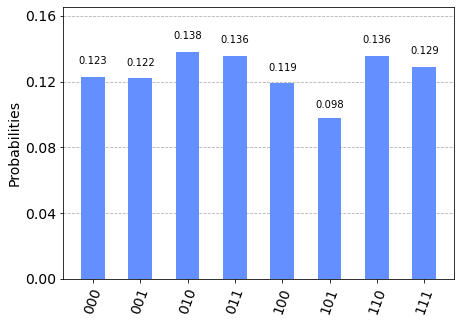

In [47]:
#Quantum Teleportation
Cir3=QuantumCircuit(3,3)
Cir3.h(0)
Cir3.barrier()
Cir3.h(1)
Cir3.cx(1,2)
Cir3.cx(0,1)
Cir3.h(0)
Cir3.barrier()
Cir3.measure([0,1],[0,1])
Cir3.barrier()
Cir3.cx(1,2)
Cir3.cz(0,2)
Cir3.measure(2,2)
Cir3.draw(initial_state=True)
simul=Aer.get_backend('qasm_simulator')
res=execute(Cir3,backend= simul,shots=1024 ).result()
cnt=res.get_counts()
plot_histogram(cnt)










